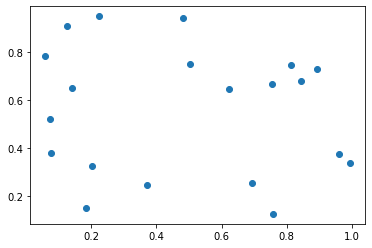

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib qt5

# data preparing
point_count = 20
points = np.random.rand(point_count * 2).reshape((point_count, 2))
plt.scatter(points[:, 0], points[:, 1])
plt.show()

穷尽搜索算法

对于点集上的任意的一条直线，如果其他所有点都在这条直线的一侧，则这两个点在凸包的点集内。<br>
其中判断点在直线的哪侧可以用两条直线的叉积的正负值决定。 <br>
算法基本思想：<br>
遍历[原点集]对应的所有直线，如果其他点都在点集的一侧，则添加这两个点到[凸包点集]中。

In [3]:
epsilon = 1e-5

LEFT_SIDE = 1
RIGHT_SIDE = 2
INLINE_SIDE = 0
def point_side(x1, y1, x2, y2, x3, y3):
    """
    @return 1: 右侧， 2：左侧， 0：在同一条直线
    """
    dot_value = x1 * y2 + x2 * y3 + x3 * y1 - x1 * y3 - x2 * y1 - x3 * y2
    if dot_value > epsilon:
        return LEFT_SIDE
    elif dot_value < epsilon:
        return RIGHT_SIDE
    return INLINE_SIDE

In [13]:
convex_hull_lines = []

if point_count <= 2:
    print("input point size must be great than 2")
for i in range(point_count):
    for j in range(i + 1, point_count):
        previous_side = INLINE_SIDE
        allSame = True
        for k in range(point_count):
            if k != i and k != j:
                cur_side = point_side(points[i][0], points[i][1], points[j][0], points[j][1], points[k][0], points[k][1])
                if cur_side == previous_side or previous_side == INLINE_SIDE or cur_side == INLINE_SIDE:
                    previous_side = cur_side
                    continue
                else:
                    allSame = False
                    break
        if allSame:
            convex_hull_lines.append((points[i], points[j]))

convex_hull_lines

[(array([0.05995951, 0.78156425]), array([0.12651145, 0.90643178])),
 (array([0.05995951, 0.78156425]), array([0.07647084, 0.37757109])),
 (array([0.12651145, 0.90643178]), array([0.2247546, 0.9480319])),
 (array([0.4819602 , 0.94254997]), array([0.2247546, 0.9480319])),
 (array([0.4819602 , 0.94254997]), array([0.89219107, 0.72916865])),
 (array([0.07647084, 0.37757109]), array([0.18490725, 0.15174739])),
 (array([0.18490725, 0.15174739]), array([0.75786634, 0.12644927])),
 (array([0.9930053 , 0.33863935]), array([0.89219107, 0.72916865])),
 (array([0.9930053 , 0.33863935]), array([0.75786634, 0.12644927]))]

In [73]:
plt.scatter(points[:, 0], points[:, 1])
for line in convex_hull_lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='red')
plt.show()

In [63]:
# 将线转化成点的集合
def point_to_hash(point):
    return str(point[0]) +','+ str(point[1])
left_hash = point_to_hash(convex_hull_lines[0][0])
points_dict = {left_hash: convex_hull_lines[0][1]}
right_hashes = [point_to_hash(convex_hull_lines[0][1])]
for line in convex_hull_lines[1:]:
    if point_to_hash(line[0]) in points_dict.keys() or point_to_hash(line[1]) in right_hashes:
        points_dict[point_to_hash(line[1])] = line[0]
        right_hashes.append(point_to_hash(line[0]))
    else:
        points_dict[point_to_hash(line[0])] = line[1]
        right_hashes.append(point_to_hash(line[1]))

convex_hull_points = [convex_hull_lines[0][0], convex_hull_lines[0][1]]
point_hash = point_to_hash(convex_hull_points[1])
step = 1
step_count = len(points_dict)
while step < step_count:
    next_point = points_dict[point_hash]
    convex_hull_points.append(next_point)
    point_hash = point_to_hash(next_point)
    step += 1

convex_hull_points

[array([0.05995951, 0.78156425]),
 array([0.12651145, 0.90643178]),
 array([0.2247546, 0.9480319]),
 array([0.4819602 , 0.94254997]),
 array([0.89219107, 0.72916865]),
 array([0.9930053 , 0.33863935]),
 array([0.75786634, 0.12644927]),
 array([0.18490725, 0.15174739]),
 array([0.07647084, 0.37757109]),
 array([0.05995951, 0.78156425])]

In [70]:
chps = np.array(convex_hull_points)
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])
line, = plt.plot([], [], color='red')
def update(draw_points):
    line.set_data(chps[0:draw_points, 0], chps[0:draw_points, 1])
    return line,
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(chps)+1), interval=500, repeat=True, repeat_delay=2000)
plt.show()

In [17]:
fig, ax = plt.subplots()
ax.scatter(points[:,0], points[:,1])

plots = []
for chp in convex_hull_lines:
    plot, = plt.plot([chp[0][0], chp[1][0]], [chp[0][1], chp[1][1]], color='red')
    plots.append([plot])
ani = animation.ArtistAnimation(fig, plots, interval=500)
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
